<a href="https://colab.research.google.com/github/divya-25-hub/Fake-news-Detector/blob/main/Fake_news_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload files


Saving True.csv to True.csv
Saving Fake.csv to Fake.csv


Accuracy: 0.9376391982182628

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      4669
           1       0.95      0.92      0.93      4311

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



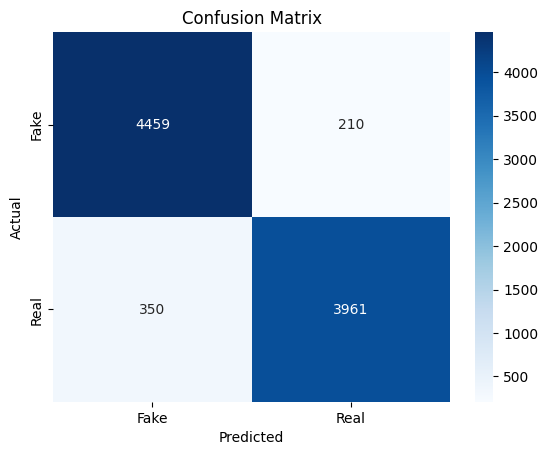


Prediction: Real News ✅

Prediction: Fake News ❌

Prediction: Real News ✅


In [4]:
# STEP 1: Install & Import Libraries
!pip install -q scikit-learn pandas seaborn matplotlib

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 2: Load the Dataset (Mount if using from Drive)
# Upload True.csv and Fake.csv to Colab (Files tab > Upload)
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

# STEP 3: Preprocessing
true_df["label"] = 1  # Real
fake_df["label"] = 0  # Fake

df = pd.concat([true_df, fake_df], ignore_index=True)
df = df[["title", "label"]].dropna()  # Use title instead of full text
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# STEP 4: Feature Extraction (TF-IDF on titles)
X = df["title"]
y = df["label"]

tfidf = TfidfVectorizer(stop_words="english", max_df=0.7)
X_tfidf = tfidf.fit_transform(X)

# STEP 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# STEP 6: Train Model
model = MultinomialNB()
model.fit(X_train, y_train)

# STEP 7: Evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# STEP 8: Test with Custom Input
def predict_news(news_title):
    text_vec = tfidf.transform([news_title])
    prediction = model.predict(text_vec)[0]
    label = "Real News ✅" if prediction == 1 else "Fake News ❌"
    print(f"\nPrediction: {label}")

# Example Test
predict_news("India got independence in 1947")
predict_news("NASA confirms aliens found on the moon")
predict_news("New vaccine causes more harm than good, experts say")


In [6]:
import joblib

# Save model and vectorizer
joblib.dump(model, "fake_news_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [7]:
from google.colab import files

files.download("fake_news_model.pkl")
files.download("tfidf_vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>